Install additional packages:

```sh
pip install matplotlib, tqdm, ipywidgets
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [2]:
from pypoptim.algorythm import Solution
from pypoptim.algorythm.ga import GA

# Simple example

In [3]:
def error(x):
    return np.sum(x**2)

class Sol(Solution):
    
    def update(self):
        self._y = error(self.x)
        
    def is_valid(self):
        return self.is_updated()

In [4]:
sol = Sol([2])
sol.update()
sol

Solution = {
    x    = [2.],
    y    = 4.0,
    data = {}
}

In [5]:
bounds = np.array([[-4, 2],
                   [-1, 5]])

ga_optim = GA(Sol, bounds)
ga_optim

GA:
[bounds_lower bounds_upper gammas mask_log_10_scale]
[[-4.  2.  1.  0.]
 [-1.  5.  1.  0.]]
mutation_rate: 1.0
crossover_rate: 1.0
selection_force: 2
keys_data_transmit: []

  0%|          | 0/10 [00:00<?, ?it/s]

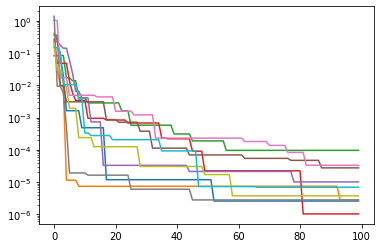

In [6]:
n_solutions = 25
n_elites = 5
n_epochs = 100

for _ in tqdm(range(10)):
    
    population = ga_optim.generate_population(n_solutions)

    loss = []

    for i in range(n_epochs):
        
        ga_optim.update_population(population)
            
        loss.append(min(population).y)
            
        elites  = ga_optim.get_elites(population, n_elites)
        mutants = ga_optim.get_mutants(population, n_solutions - n_elites)
        
        population = elites + mutants

    plt.semilogy(loss)

In [7]:
ga_optim.update_population(population)
X = np.array([sol.x for sol in sorted(population)])
Y = np.array([sol.y for sol in sorted(population)])

In [8]:
X[0]

array([-0.00258393,  0.0005243 ])

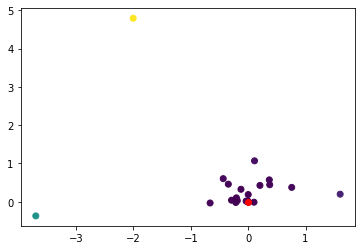

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.plot(X[0, 0], X[0, 1], 'or')

# All at once

In [10]:
n_solutions = 10
n_elites = 1
n_epochs = 10

population = ga_optim.run(n_solutions, n_epochs, n_elites)
population

[Solution = {
     x    = [ 0.16797336 -0.08570547],
     y    = 0.035560476435283477,
     data = {}
 },
 Solution = {
     x    = [-0.26034526  0.62534349],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 0.29692863 -0.61888924],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 0.01576596 -0.81728122],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [-3.79608294  2.7300531 ],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 0.92439852 -0.9448638 ],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 0.65624746 -0.69614822],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [0.20432971 0.52754299],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 1.88465938 -0.54323703],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [1.33707673 1.26435481],
     y    = None,
     data = {}
 }]